In [1]:
#Reading and understanding the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline





In [2]:
housing = pd.read_csv('Housing.csv')

In [3]:
housing.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#DATA CLEANING

In [8]:
# Checking null values as a percentage
null_percentage = (housing.isnull().sum() * 100) / housing.shape[0]

# Display the result
print(null_percentage)


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


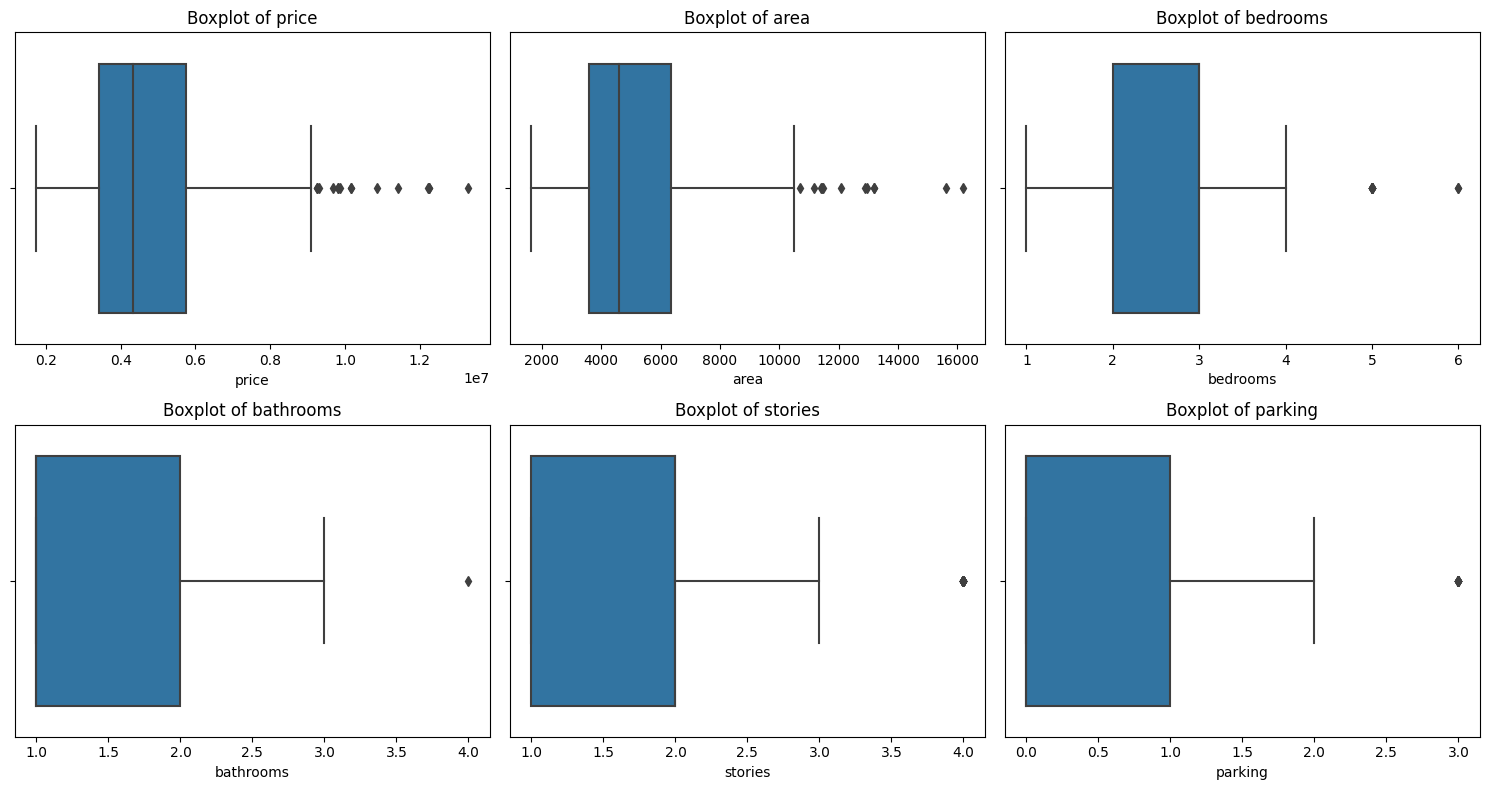

In [9]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# List of columns for outlier analysis
columns_for_outliers = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Loop through columns and create boxplots
for i, column in enumerate(columns_for_outliers):
    sns.boxplot(x=housing[column], ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

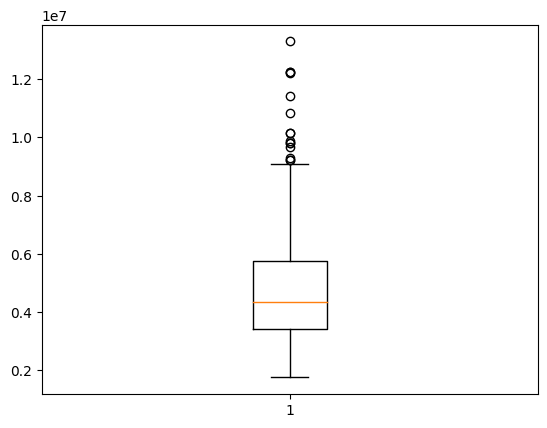

In [10]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

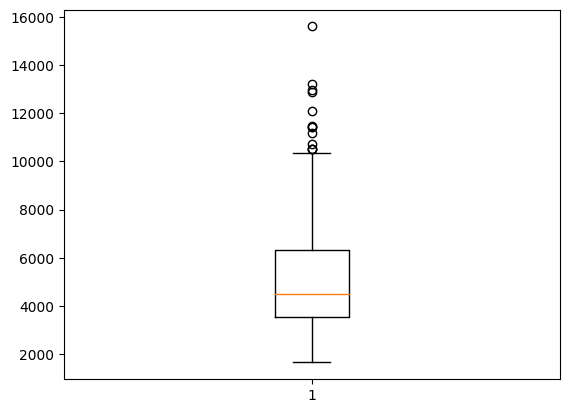

In [11]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [12]:
#Exploratory Data Analytics

In [13]:
#Visualising Numeric Variables

<function matplotlib.pyplot.show(close=None, block=None)>

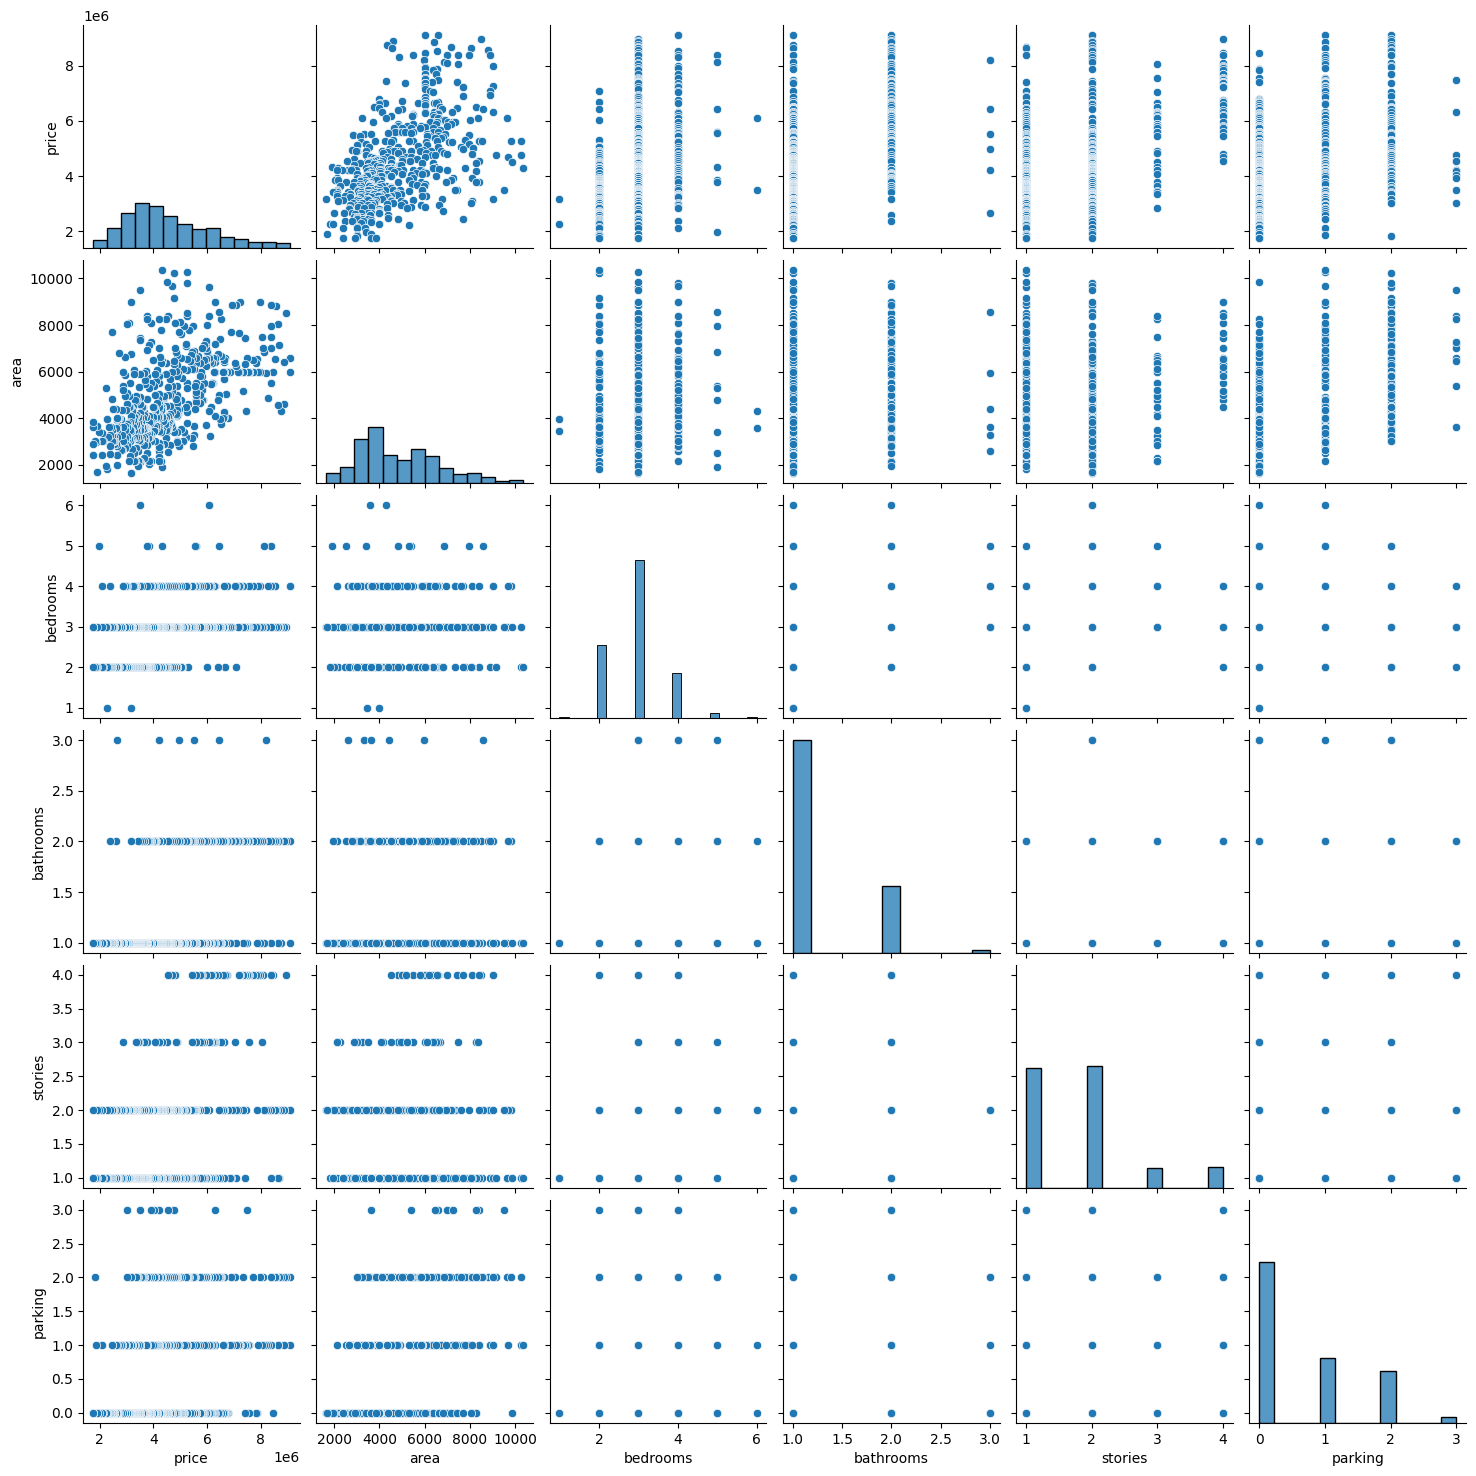

In [14]:
sns.pairplot(housing)
plt.show

In [15]:
#Visualising Categorical Variables

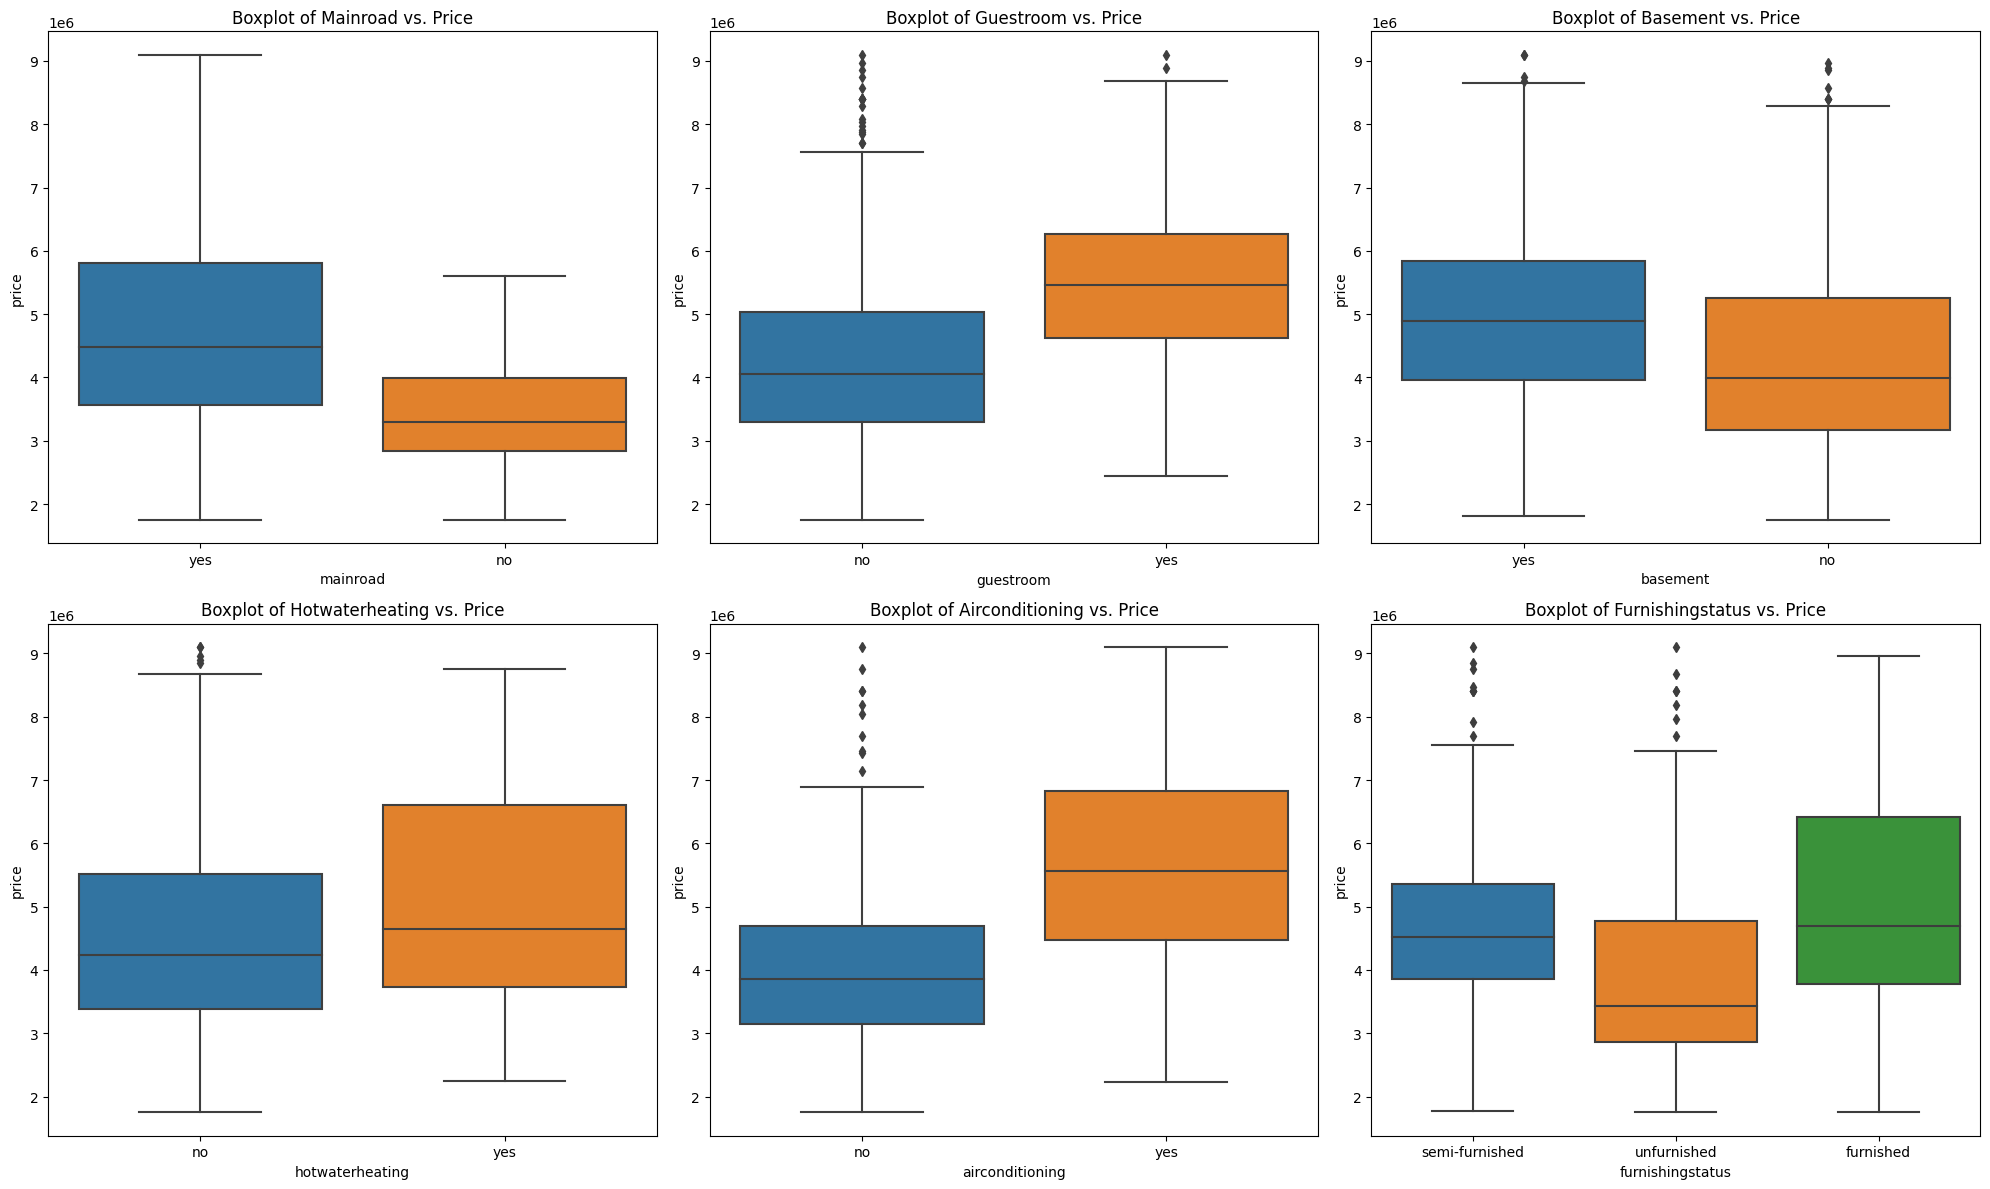

In [16]:
# Define the categorical variables for analysis
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Set up subplots
plt.figure(figsize=(20, 12))

# Loop through categorical variables and create boxplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=var, y='price', data=housing)
    plt.title(f'Boxplot of {var.capitalize()} vs. Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


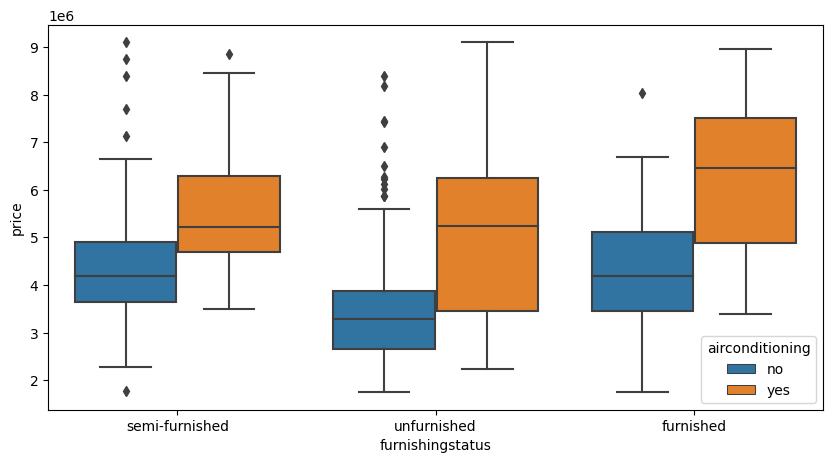

In [17]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [18]:
# List of binary variables to map
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Define a function to map 'yes' to 1 and 'no' to 0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Apply the mapping function to the specified binary variables
housing[binary_vars] = housing[binary_vars].apply(binary_map)


In [19]:
#checking the housing dataframe 
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [20]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


In [21]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)
# Now let's see the head of our dataframe.

housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [22]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [23]:
#Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test=train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

In [24]:
#Rescaling the Features 
"""two common ways of rescaling: 1.Min-Max scaling 2.Standardisation (mean-0, sigma-1)"""

'two common ways of rescaling: 1.Min-Max scaling 2.Standardisation (mean-0, sigma-1)'

In [25]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()



In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,True,False
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,True,False
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,False,False
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,False,False
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,False,True


In [28]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


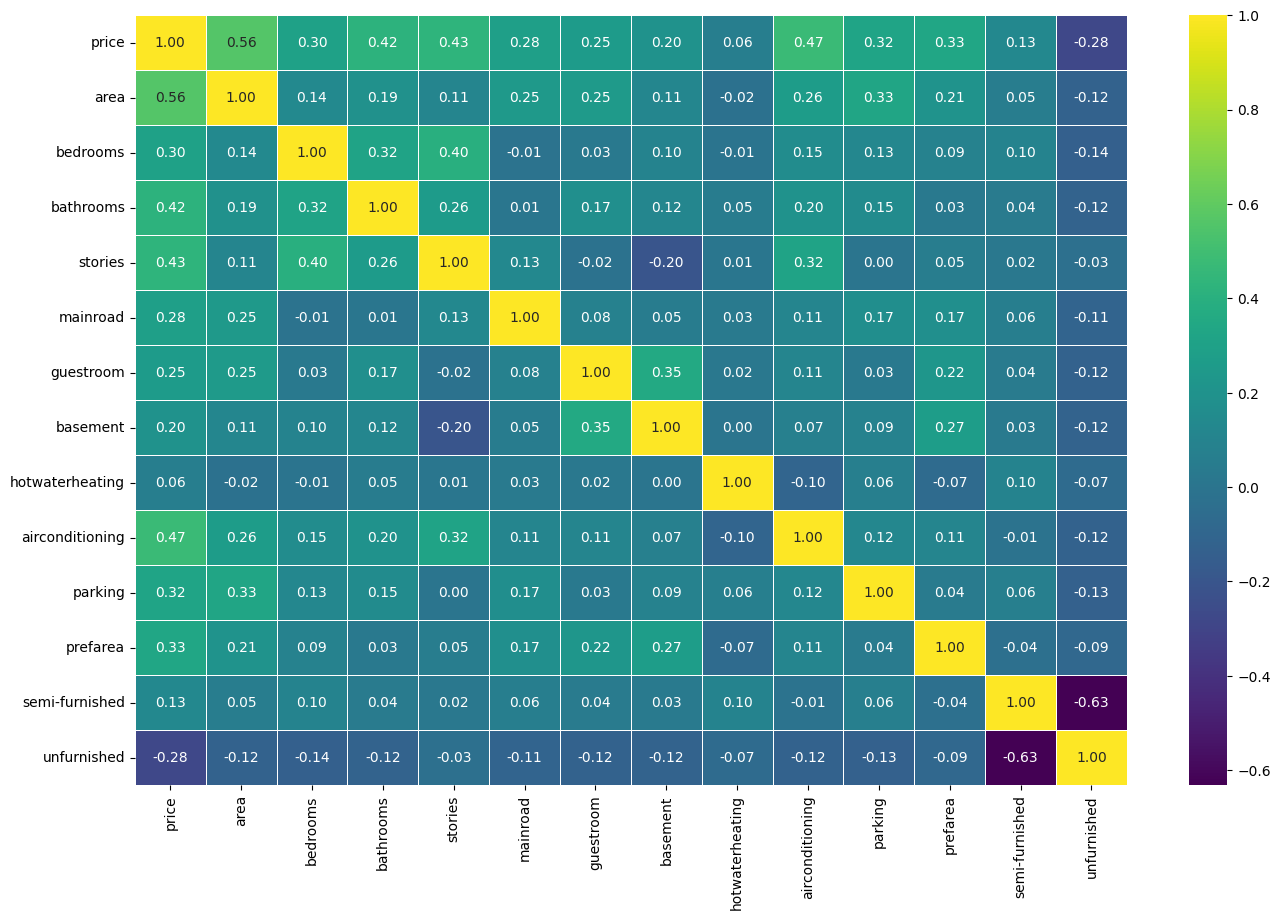

In [29]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))
# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True,cmap = 'viridis', fmt=".2f", linewidths=.5)
# Show the plot
plt.show()

In [30]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [31]:
# Importing RFE(Recursive feature elimination) and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lm = LinearRegression()

# Specify the number of features to select (in this case, 6)
num_features_to_select = 6

# Create RFE model
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)
# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Extract information about selected features
selected_features_info = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Display the information
for feature, is_selected, ranking in selected_features_info:
    print(f"Feature: {feature}, Selected: {is_selected}, Ranking: {ranking}")


Feature: area, Selected: True, Ranking: 1
Feature: bedrooms, Selected: False, Ranking: 7
Feature: bathrooms, Selected: True, Ranking: 1
Feature: stories, Selected: True, Ranking: 1
Feature: mainroad, Selected: False, Ranking: 5
Feature: guestroom, Selected: False, Ranking: 6
Feature: basement, Selected: False, Ranking: 4
Feature: hotwaterheating, Selected: False, Ranking: 2
Feature: airconditioning, Selected: True, Ranking: 1
Feature: parking, Selected: True, Ranking: 1
Feature: prefarea, Selected: True, Ranking: 1
Feature: semi-furnished, Selected: False, Ranking: 8
Feature: unfurnished, Selected: False, Ranking: 3


In [32]:
col= X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [34]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe=X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
#Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()
# Print a summary of the regression results
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.31e-69
Time:                        13:57:12   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [35]:
"""Calculating the Variance Inflation Factors (VIFs) helps assess multicollinearity among the independent variables in a regression model. Here's an example of how you can calculate VIFs using the variance_inflation_factor function from statsmodels.stats.outliers_influence:
"""

"Calculating the Variance Inflation Factors (VIFs) helps assess multicollinearity among the independent variables in a regression model. Here's an example of how you can calculate VIFs using the variance_inflation_factor function from statsmodels.stats.outliers_influence:\n"

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIFs for the features in X_train_rfe
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) 
for i in range(X_train_rfe.shape[1])]

# Display the VIFs
print(vif_data)


          Variable       VIF
0            const  4.511353
1             area  1.244126
2        bathrooms  1.122533
3          stories  1.168453
4  airconditioning  1.198324
5          parking  1.136148
6         prefarea  1.050506


In [37]:
#Residual Analysis of the train data

In [38]:
y_train_price= lm.predict(X_train_rfe)
res=(y_train_price-y_train)

Text(0.5, 0, 'Errors')

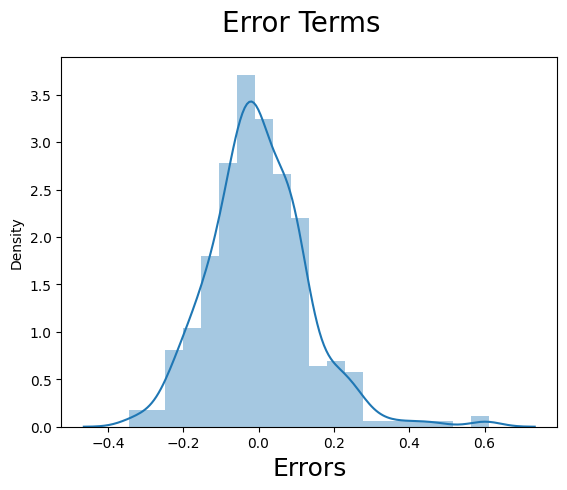

In [39]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)  # X-label


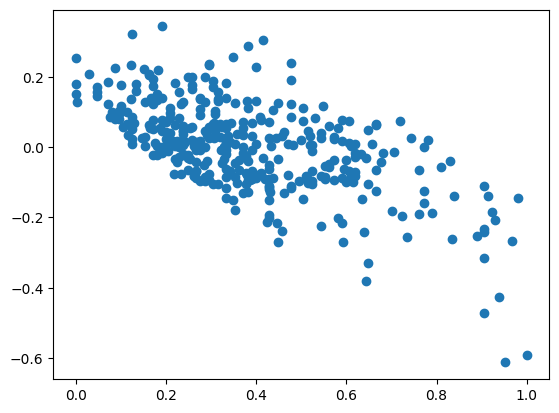

In [40]:
plt.scatter(y_train,res)
plt.show()

In [41]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']


In [42]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [43]:
y_test = df_test.pop('price')
X_test = df_test

In [44]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]


In [45]:
# Making predictions on the test set
y_pred = lm.predict(X_test_rfe)

# Calculating R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r2}")


R-squared on test set: 0.579124777439774


Text(0, 0.5, 'y_pred')

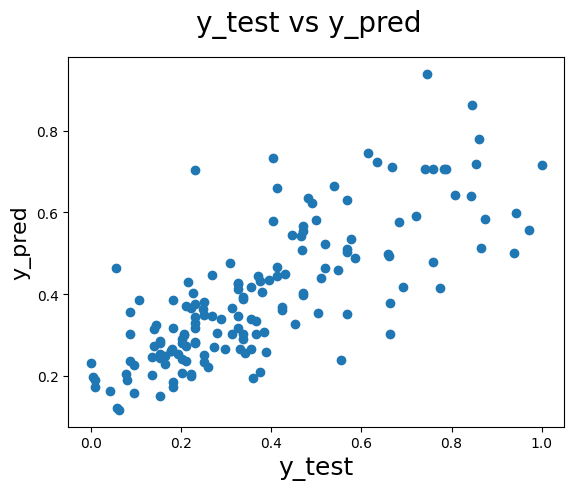

In [46]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)  # X-label
plt.ylabel('y_pred', fontsize=16)  # Y-label
